This notebook is a continuation of 'capstoneEDA.ipynb'

It imports the cleaned data and creates the regressor models that predict the 
lifetime adjusted gross for each movie. Each model is scored using a number of 
metrics. The best performing model, according to mean absolute percent error, 
was the created using GradientBoostingRegressor(), with a score of 30%. 
This means the model is able to predict the lifetime adjusted gross of a movie, 
on average, with an error of +/- 30%. 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBClassifier
import itertools

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


### create a function for scoring to calculate mean absolute percent error

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    """This function calculatues the mean absolute percent error of the model"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Importing the clean dataframe from 'capstoneEDA.ipynb'

In [3]:
final_df = pd.read_csv('capstone_df')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 64 columns):
movie_name                   1000 non-null object
movie_name_no_year           1000 non-null object
adj_lifetime_gross           1000 non-null float64
lifetime_gross               1000 non-null float64
est_num_tickets              1000 non-null float64
mpaa_rating                  1000 non-null object
running_time                 1000 non-null object
earliest_dom_release_date    1000 non-null object
production_companies         1000 non-null object
movie_genre                  1000 non-null object
cast                         1000 non-null object
director                     1000 non-null object
writer                       1000 non-null object
producer                     1000 non-null object
composer                     1000 non-null object
cinematographer              1000 non-null object
prod_designer                1000 non-null object
editor                       1000 non-nul

### specify columns for train test split

In [4]:
y = final_df['adj_lifetime_gross']
X = final_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
                   'movie_name', 'movie_name_no_year', 'mpaa_rating', \
                   'running_time', 'float_run_time', 'franchise', 'movie_genre', \
                   'earliest_dom_release_date', 'production_companies', 'cast', \
                   'director', 'writer', 'producer', 'composer', 'cinematographer', \
                   'prod_designer', 'editor'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split \
    (X, y, test_size = 0.25, random_state = 123)


### create a function that takes in the regressor model name and hyperparameter grid name and outputs scoring and optimal hyperparameters


### r2_score: computes the coefficient of determination. It represents the proportion of variance of 'y' that has been expained by the independent variables in the model. Provides an indication of goodness of fit. Best possible score is 1. 

### mean_absolute_error: the average of all of the absolute differences between what the target predicts and what the target actually is. 

### median_absolute_error: the median of all the absolute differences between what the target predicts and what the target actually is. outliers are less relevant than the mean absolute error.

### mean_absolute_percent_error: the average of all the percent differences between what the target predicts and what the target actually is. 

In [5]:
def model_function(model_name, grid_name):
    """This function will take in the model and hyperparameter 
    grid search name, and will run and score the model"""

    grid = GridSearchCV(estimator = model_name,
                             param_grid = grid_name,
                             cv = None,
                             n_jobs = -1)

    grid.fit(X_train, y_train)

    print(grid.best_params_)


    training_preds = grid.predict(X_train)
    test_preds = grid.predict(X_test)



    print('Training R2 Score, Random Forest Regressor: ', \
          r2_score(y_train, training_preds))
    print('Test R2 Score, Random Forest Regressor: ', \
          r2_score(y_test, test_preds))
    print('Training Mean Absolute Error Score, Random Forest Regressor: ', \
          mean_absolute_error(y_train, training_preds))
    print('Test Mean Absolute Error Score, Random Forest Regressor: ', \
          mean_absolute_error(y_test, test_preds))
    print('Training Median Absolute Error Score, Gradient Boosting Regressor: ', \
          median_absolute_error(y_train, training_preds))
    print('Test Median Absolute Error Score, Gradient Boosting Regressor: ', \
          median_absolute_error(y_test, test_preds))
    print('Training Mean Absolute Percent Error, Gradient Boosting Regressor: ', \
          mean_absolute_percentage_error(y_train, training_preds))
    print('Test Mean Absolute Percent Error, Gradient Boosting Regressor: ', \
          mean_absolute_percentage_error(y_test, test_preds))


### create a function that takes in the regressor model name, and hyperparameter grid name and output a feature importance plot

In [6]:
def feature_importance(model_name, grid_name = None):    
    """This function will take in the model and hyperparameter grid 
    seach name and will plot feature importance for the model"""
    
    model_name.fit(X_train, y_train)
    model_name.feature_importances_
    n_features = X_train.shape[1]
    plt.figure(figsize = (16,18))
    plt.barh(range(n_features), model_name.feature_importances_,align = 'center', \
             color = 'orchid')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 14)
    plt.xlabel('Feature Importance', fontsize = 16)
    plt.grid(zorder=0)
    plt.show()
    

### A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 75, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.7394504605984529
Test R2 Score, Random Forest Regressor:  0.24446104833601834
Training Mean Absolute Error Score, Random Forest Regressor:  54851917.35742647
Test Mean Absolute Error Score, Random Forest Regressor:  97550912.55949911
Training Median Absolute Error Score, Gradient Boosting Regressor:  34705352.341041386
Test Median Absolute Error Score, Gradient Boosting Regressor:  59643631.69759838
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  19.899524159264388
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  34.1334086102291


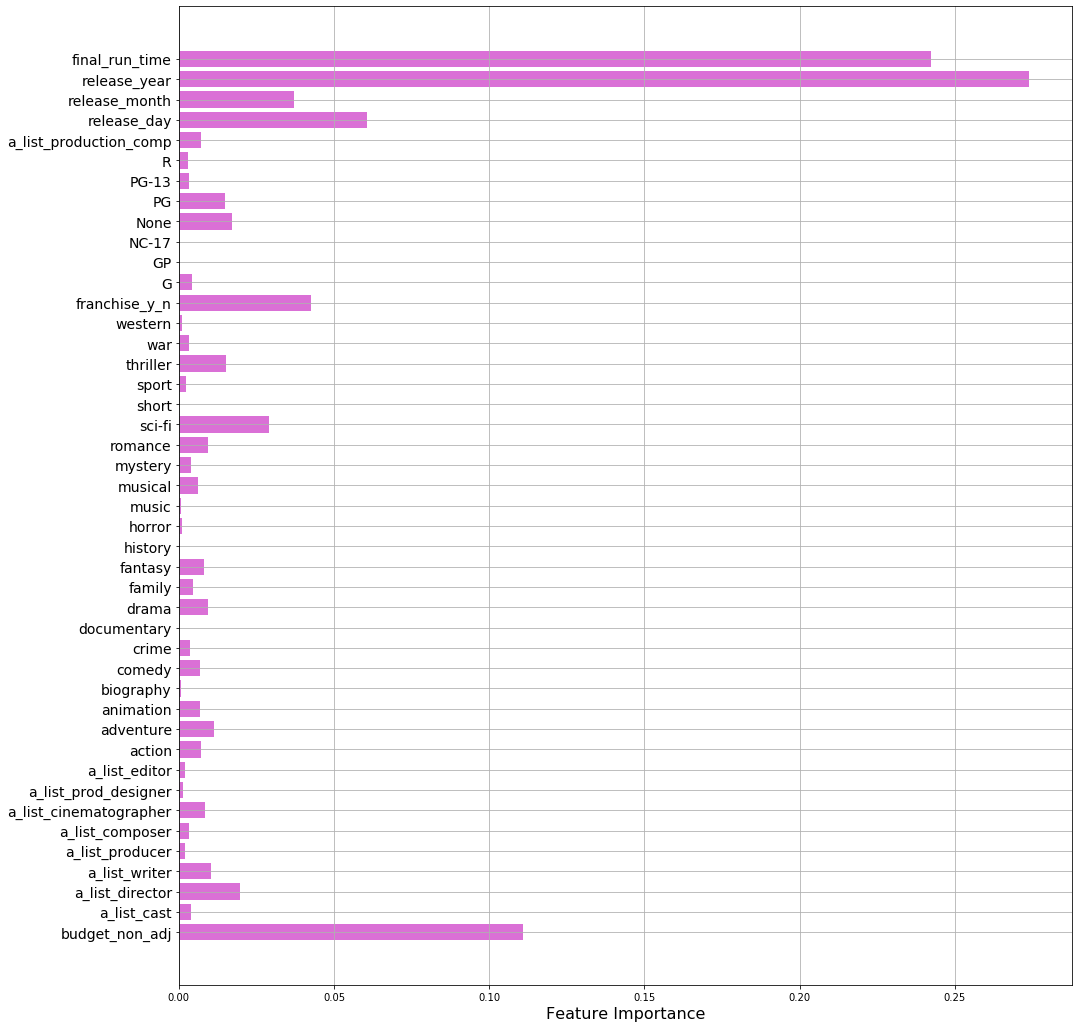

In [7]:
rfr = RandomForestRegressor()

rfr_parameters = {'n_estimators':[45, 60, 75, 90],                   
                  'max_depth': [15, 20, 25, 30],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }


model_function(rfr, rfr_parameters)
feature_importance(rfr, rfr_parameters)


### This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor

{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 350, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.8161188936341615
Test R2 Score, Random Forest Regressor:  0.25516302827740833
Training Mean Absolute Error Score, Random Forest Regressor:  44243886.947821036
Test Mean Absolute Error Score, Random Forest Regressor:  97311312.2120242
Training Median Absolute Error Score, Gradient Boosting Regressor:  27372782.437274173
Test Median Absolute Error Score, Gradient Boosting Regressor:  60702254.32215476
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  15.599816130757437
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  33.64315107900558


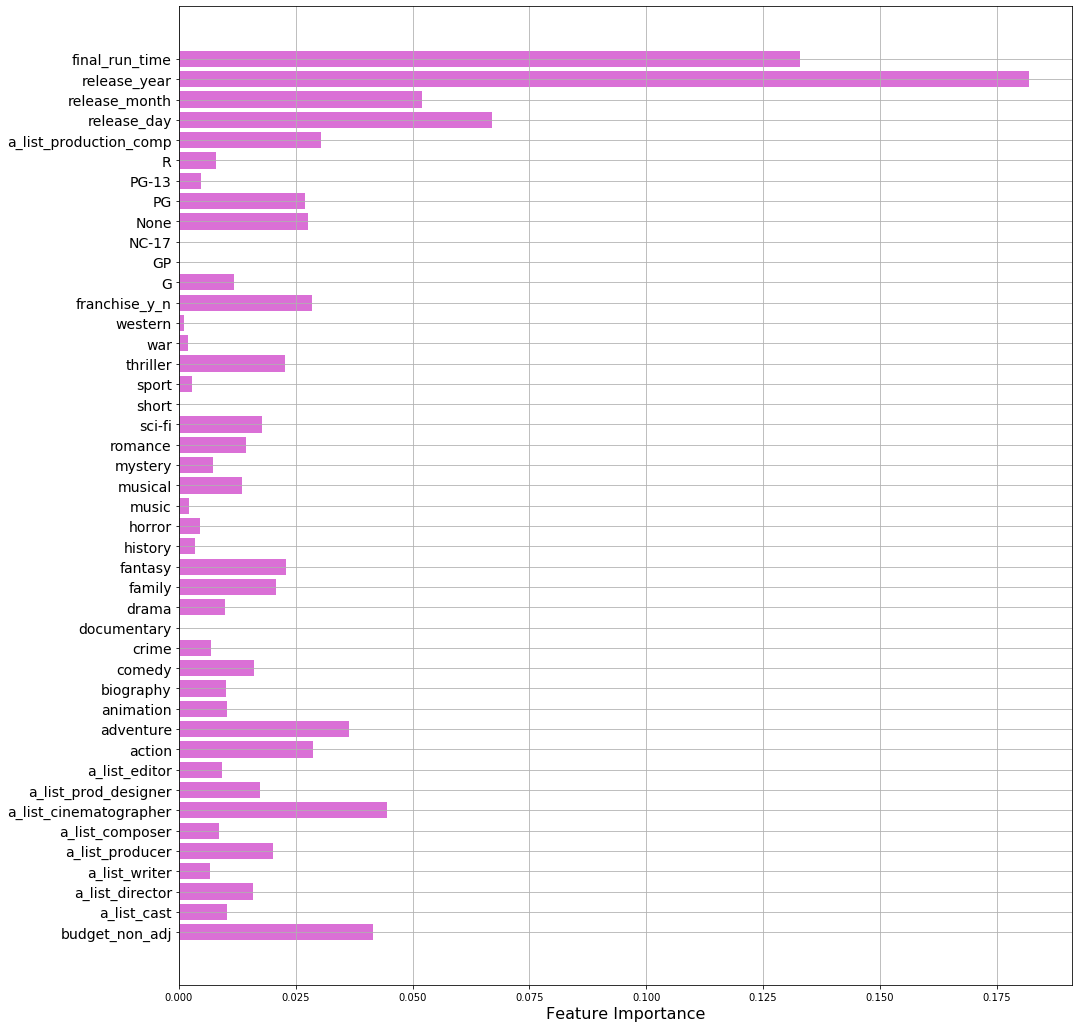

In [8]:
etr = ExtraTreesRegressor()

etr_parameters = {'n_estimators': [250, 300, 350, 400],                   
                  'max_depth': [5, 10, 15, 20],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }


model_function(etr, etr_parameters)
feature_importance(etr, etr_parameters)


### GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 85, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.6865075610156681
Test R2 Score, Random Forest Regressor:  0.28794850043866527
Training Mean Absolute Error Score, Random Forest Regressor:  70419243.04043552
Test Mean Absolute Error Score, Random Forest Regressor:  92450095.37067011
Training Median Absolute Error Score, Gradient Boosting Regressor:  54508767.71950418
Test Median Absolute Error Score, Gradient Boosting Regressor:  58117848.94404945
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  27.22247434911808
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  31.245011510400357


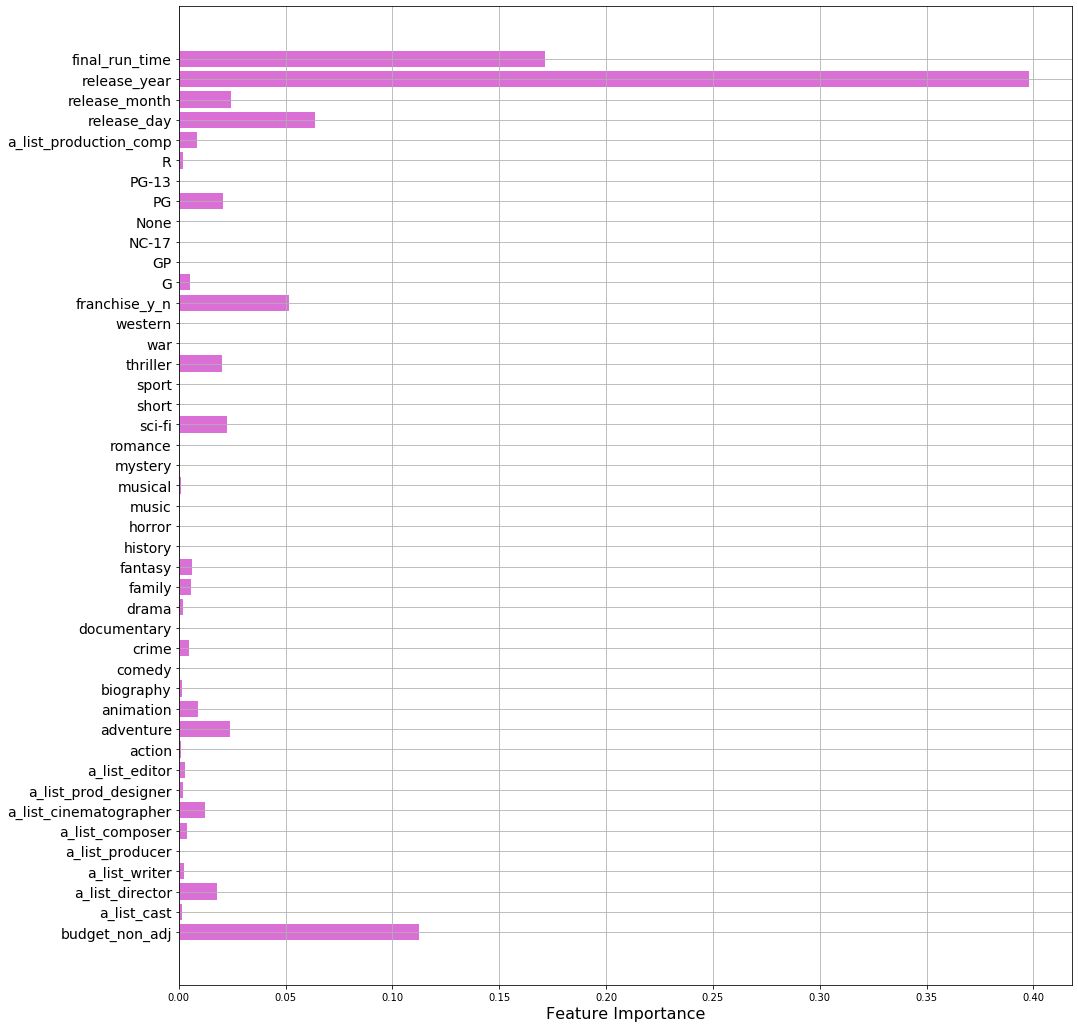

In [10]:
gbr = GradientBoostingRegressor()

gbr_parameters = {'n_estimators':[85, 90, 95],                   
                  'max_depth': [1, 3, 5, 7],
                  'min_samples_leaf': [1, 3, 5, 7],
                  'random_state': [123]
                 }

model_function(gbr, gbr_parameters)
feature_importance(gbr, gbr_parameters)


### An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor

{'learning_rate': 0.025, 'n_estimators': 10, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.3932839268220123
Test R2 Score, Random Forest Regressor:  0.22859345658370556
Training Mean Absolute Error Score, Random Forest Regressor:  93500036.8632603
Test Mean Absolute Error Score, Random Forest Regressor:  96122398.476279
Training Median Absolute Error Score, Gradient Boosting Regressor:  69425146.62200001
Test Median Absolute Error Score, Gradient Boosting Regressor:  65676371.410666674
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  34.112050969851055
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  31.77891492434047


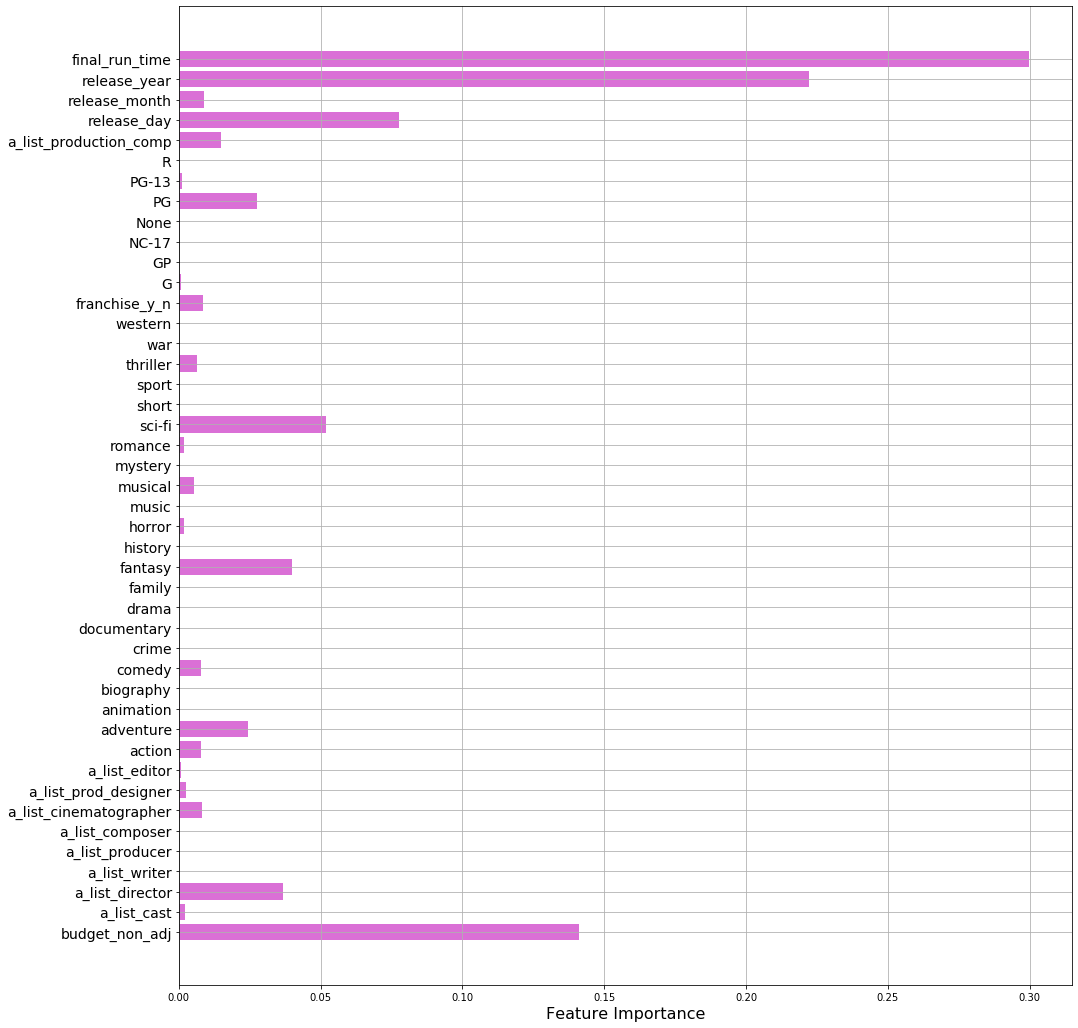

In [11]:
abr = AdaBoostRegressor()

abr_parameters = {'n_estimators':[10, 15, 20],                   
                  'learning_rate': [0.020, 0.025, 0.030],
                  'random_state': [123]
                 }

model_function(abr, abr_parameters)
feature_importance(abr, abr_parameters)


### A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

In [12]:
br = BaggingRegressor()

br_parameters = {'n_estimators':[10, 20, 30, 40, 50],
                 'max_samples': [20, 25, 30],
                 'max_features': [10, 20, 30],
                 'random_state': [123]
                 }



model_function(br, br_parameters)


{'max_features': 20, 'max_samples': 30, 'n_estimators': 30, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.1741352821259302
Test R2 Score, Random Forest Regressor:  0.14730042775679164
Training Mean Absolute Error Score, Random Forest Regressor:  111174821.49693333
Test Mean Absolute Error Score, Random Forest Regressor:  110462000.55846666
Training Median Absolute Error Score, Gradient Boosting Regressor:  87471089.48333333
Test Median Absolute Error Score, Gradient Boosting Regressor:  87176730.93333334
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  44.35369570549631
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  40.76994169356662


### LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
lr = LinearRegression()
lr_parameters = {}

model_function(lr, lr_parameters)


{}
Training R2 Score, Random Forest Regressor:  0.3629118629267053
Test R2 Score, Random Forest Regressor:  0.32177114145110264
Training Mean Absolute Error Score, Random Forest Regressor:  97491574.71933725
Test Mean Absolute Error Score, Random Forest Regressor:  102142335.74791154
Training Median Absolute Error Score, Gradient Boosting Regressor:  73431921.04045677
Test Median Absolute Error Score, Gradient Boosting Regressor:  77234098.6863594
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  37.664379046602505
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  37.81264762637577


### The GradientBoostingRegressor returned the lowest mean absolute percent error. To attempt to improve the model even further, more features are going to be added to the model based on the high feature importance of the existing column, franchise_y_n, which simply indicated whether the movie is part of a franchise or not. The added features will include the top 20 grossing franchises, and the rows will indicate whether that particular movie is part of that particular franchise or not. 

### Adding these additional 20 franchise predictors improved the performance of the model by 1%. 


In [14]:
franchise_df = final_df.copy()
grouped_franchise_df = franchise_df.groupby('franchise')['adj_lifetime_gross'].sum() \
    .sort_values(ascending = False).to_frame().reset_index().head(21)

top_20_franchise = list(grouped_franchise_df['franchise'])
top_20_franchise.remove('None')

for i in top_20_franchise:
    x = franchise_df['franchise'] == i
    franchise_df.loc[x, i] = 1
    franchise_df.loc[~x, i] = 0

franchise_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
movie_name                         1000 non-null object
movie_name_no_year                 1000 non-null object
adj_lifetime_gross                 1000 non-null float64
lifetime_gross                     1000 non-null float64
est_num_tickets                    1000 non-null float64
mpaa_rating                        1000 non-null object
running_time                       1000 non-null object
earliest_dom_release_date          1000 non-null object
production_companies               1000 non-null object
movie_genre                        1000 non-null object
cast                               1000 non-null object
director                           1000 non-null object
writer                             1000 non-null object
producer                           1000 non-null object
composer                           1000 non-null object
cinematographer                    1000 non-null ob

In [15]:
y = franchise_df['adj_lifetime_gross']
X = franchise_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets',\
                       'movie_name', 'movie_name_no_year', 'mpaa_rating', \
                       'running_time', 'float_run_time', 'franchise', 'movie_genre',\
                       'earliest_dom_release_date', 'production_companies', 'cast', \
                       'director', 'writer', 'producer', 'composer', 'cinematographer',\
                       'prod_designer', 'editor'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split \
    (X, y, test_size = 0.25, random_state = 123)


{'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 80, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.7081949361854462
Test R2 Score, Random Forest Regressor:  0.3774968361625509
Training Mean Absolute Error Score, Random Forest Regressor:  70720237.96370833
Test Mean Absolute Error Score, Random Forest Regressor:  86160745.70598133
Training Median Absolute Error Score, Gradient Boosting Regressor:  55486817.317212
Test Median Absolute Error Score, Gradient Boosting Regressor:  56771135.86179751
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  27.88925977198396
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  29.949847449950955


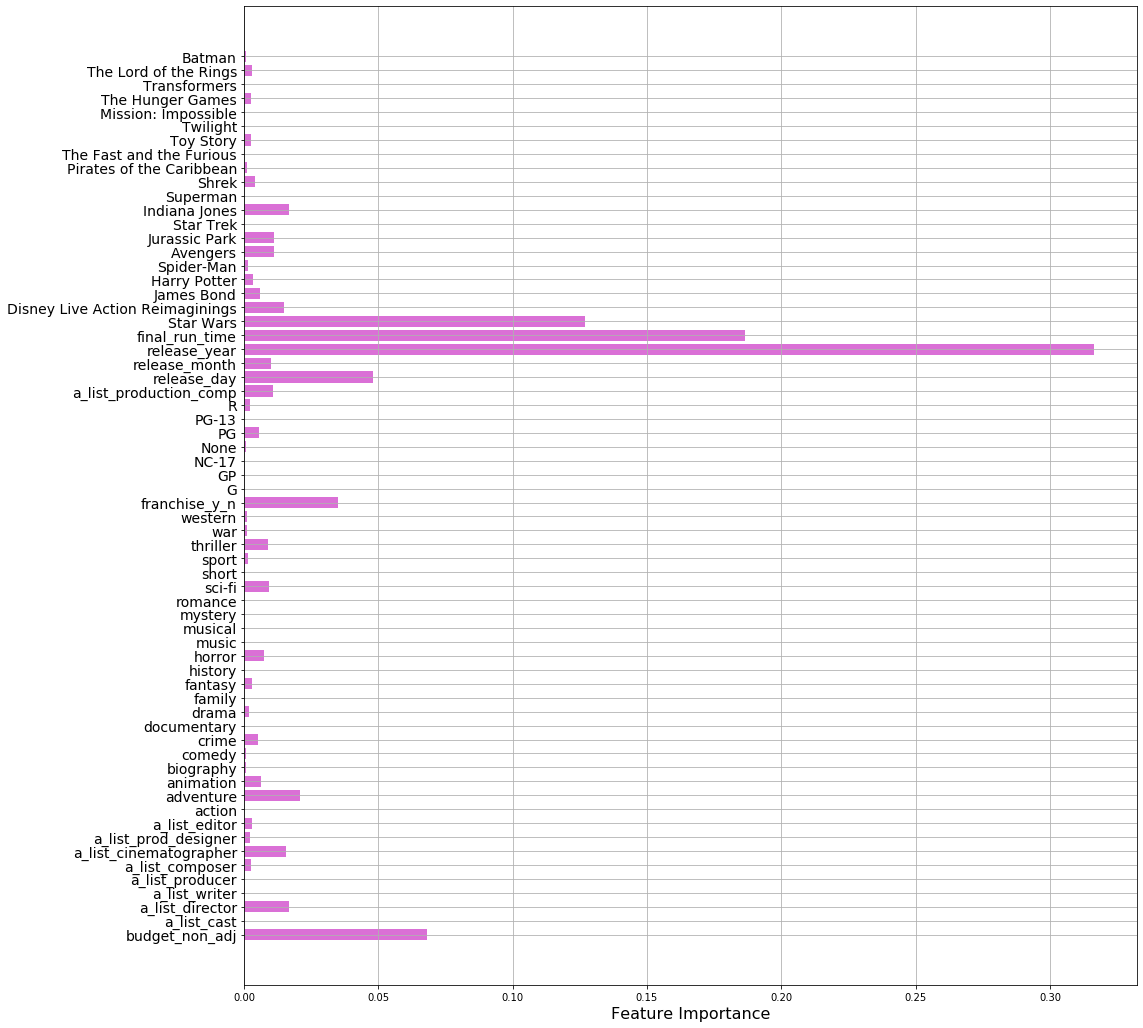

In [17]:
gbr = GradientBoostingRegressor()

gbr_parameters = {'n_estimators':[70, 80, 90],                   
                  'max_depth': [1, 3, 5, 7],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }

model_function(gbr, gbr_parameters)
feature_importance(gbr, gbr_parameters)



### Live Demo:

### Using this model, the lifetime adjusted gross of a chosen movie will be predicted and the absolute percent error calculated. 

### Examples to run: 

Harry Potter and the Sorcerer's Stone

Harry Potter and the Chamber of Secrets

Harry Potter and the Prisoner of Azkaban

Harry Potter and the Goblet of Fire

Harry Potter and the Order of the Phoenix

Harry Potter and the Half-Blood Prince

Harry Potter and the Deathly Hallows: Part 1

Harry Potter and the Deathly Hallows: Part 2



In [18]:
y = franchise_df.loc[franchise_df['movie_name_no_year'] == \
                     "Harry Potter and the Sorcerer's Stone", \
                     'adj_lifetime_gross']

x = franchise_df.loc[franchise_df['movie_name_no_year'] == \
                     "Harry Potter and the Sorcerer's Stone"]

X = x.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
            'movie_name', 'movie_name_no_year', 'mpaa_rating', 'running_time', \
            'float_run_time', 'franchise', 'movie_genre', 'earliest_dom_release_date', \
            'production_companies', 'cast', 'director', 'writer', 'producer', \
            'composer', 'cinematographer', 'prod_designer', 'editor'], axis = 1)

predict = gbr.predict(X)
print('Actual Gross: $', float(y.values))
print('Prediction Gross: $', round(float(predict), 2))
print('Absolute Percent Error: ', round(mean_absolute_percentage_error(y, predict), 2), '%')


Actual Gross: $ 526061784.0
Prediction Gross: $ 444213414.27
Absolute Percent Error:  15.56 %


### Below, the model was attempted to be improved even further by adding more features describing the production company of the movies, similar to that completed above with franchises. This did not improve the model, and resulted instead in overfitting the model. 

In [ ]:
# prod_comp_df = franchise_df.copy()
# grouped_prod_comp_df = prod_comp_df.groupby('production_companies') \
#     ['adj_lifetime_gross'].sum().sort_values(ascending = False).to_frame().reset_index().head(15)
# grouped_prod_comp_df


In [ ]:
# top_15_prod_comp = list(grouped_prod_comp_df['production_companies'])

# for i in top_15_prod_comp:
#     x = prod_comp_df['production_companies'] == i
#     prod_comp_df.loc[x, i] = 1
#     prod_comp_df.loc[~x, i] = 0
    
# prod_comp_df.info()

In [ ]:
# y = prod_comp_df['adj_lifetime_gross']
# X = prod_comp_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
#                        'movie_name', 'movie_name_no_year', 'mpaa_rating', \
#                        'running_time', 'float_run_time', 'franchise', 'movie_genre', \
#                        'earliest_dom_release_date', 'production_companies', 'cast', \
#                        'director', 'writer', 'producer', 'composer', 'cinematographer', \
#                        'prod_designer', 'editor'], axis = 1)

# X_train, X_test, y_train, y_test = train_test_split \
#     (X, y, test_size = 0.25, random_state = 123)



In [ ]:
# gbr = GradientBoostingRegressor()

# gbr_parameters = {'n_estimators':[70, 75, 80, 85],                   
#                   'max_depth': [1, 3, 5, 7],
#                   'min_samples_split': [3, 5, 7, 9],
#                   'min_samples_leaf': [1, 3, 5, 7],
#                   'random_state': [123]
#                  }

# model_function(gbr, gbr_parameters)
# feature_importance(gbr, gbr_parameters)

